In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [8]:
conn = sqlite3.connect('../db.sqlite3')

query = '''
SELECT 
    o.id,
    o.datetime,
    oi.product_id,
    oi.quantity,
    p.name,
    p.price
FROM 
    restaurant_orderitem oi
JOIN 
    restaurant_order o ON oi.order_id = o.id
JOIN 
    restaurant_product p ON oi.product_id = p.id
'''

df = pd.read_sql_query(query, conn)

conn.close()

df.to_csv('combined_data.csv', index=False)
df

,id,datetime,product_id,quantity,name,price
0,1,2019-08-03 20:25:00,6,2,Plain Papadum,0.80
1,1,2019-08-03 20:25:00,240,1,King Prawn Balti,12.95
2,1,2019-08-03 20:25:00,19,1,Garlic Naan,2.95
3,1,2019-08-03 20:25:00,36,1,Mushroom Rice,3.95
4,1,2019-08-03 20:25:00,111,1,Paneer Tikka Masala,8.95
...,...,...,...,...,...,...
74813,3255,2016-05-18 18:53:00,247,2,House Red wine 75cl,17.95
74814,12905,2016-05-14 19:28:00,247,2,House Red wine 75cl,17.95
74815,3272,2016-05-10 13:18:00,247,2,House Red wine 75cl,17.95
74816,11404,2016-04-07 19:04:00,248,1,House white wine 75cl,17.95


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

([<matplotlib.patches.Wedge at 0x1ac9b506440>,
 [Text(0.7334749822569903, 0.8197648750727906, 'Plain Papadum'),
  Text(-0.6335860294320578, 0.8992045058319714, 'Pilau Rice'),
  Text(-1.0979774496664354, 0.0666747330252651, 'Plain Naan'),
  Text(-0.9110265066038342, -0.6164663042415328, 'Garlic Naan'),
  Text(-0.5077575427212486, -0.9757982772118833, 'Plain Rice'),
  Text(-0.03148582521550273, -1.0995492907598545, 'Onion Bhajee'),
  Text(0.4143518924352689, -1.0189762064127463, 'Mango Chutney'),
  Text(0.773026976698889, -0.7825786179648506, 'Chicken Tikka Masala'),
  Text(0.9936144708256509, -0.4719430933553978, 'Chapati'),
  Text(1.0884073656861342, -0.15927776467595867, 'Mint Sauce')],
 [Text(0.4000772630492674, 0.4471444773124312, '26.8%'),
  Text(-0.34559237969021334, 0.4904751849992571, '16.0%'),
  Text(-0.5988967907271465, 0.036368036195599134, '12.5%'),
  Text(-0.49692354905663677, -0.3362543477681088, '8.3%'),
  Text(-0.2769586596661356, -0.5322536057519363, '7.5%'),
  Text(-0.

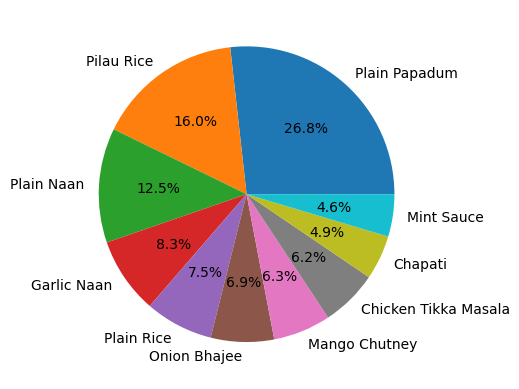

In [9]:
sql_formatted = pd.read_csv("combined_data.csv")
product_and_quantity = sql_formatted.groupby("name")["quantity"].sum()
top_10_products = product_and_quantity.nlargest(10)
plt.pie(top_10_products, labels=top_10_products.index, autopct="%1.1f%%")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

([<matplotlib.patches.Wedge at 0x1ac9e2c19f0>,
 [Text(0.9387328794750449, 0.5733939143315796, 'Chicken Tikka Masala'),
  Text(0.009681654097155542, 1.0999573926175246, 'Pilau Rice'),
  Text(-0.7716435090854987, 0.7839427880184995, 'Plain Naan'),
  Text(-1.0844087919380978, 0.18454693703054365, 'Korma'),
  Text(-1.0109683797610174, -0.43352385761729834, 'Bombay Aloo'),
  Text(-0.6451955719406032, -0.8909111481782221, 'Onion Bhajee'),
  Text(-0.103801288740014, -1.0950914539233298, 'Butter Chicken'),
  Text(0.4397325703890913, -1.0082833265203799, 'Garlic Naan'),
  Text(0.8586767732268664, -0.6875130537820332, 'Korma - Chicken'),
  Text(1.0742923464872818, -0.2364232524073093, 'Plain Rice')],
 [Text(0.5120361160772972, 0.31276031690813433, '17.5%'),
  Text(0.005280902234812114, 0.5999767596095588, '14.8%'),
  Text(-0.4208964595011811, 0.4276051571009997, '10.2%'),
  Text(-0.5914957046935079, 0.10066196565302381, '9.7%'),
  Text(-0.5514372980514639, -0.23646755870034453, '8.6%'),
  Text(-

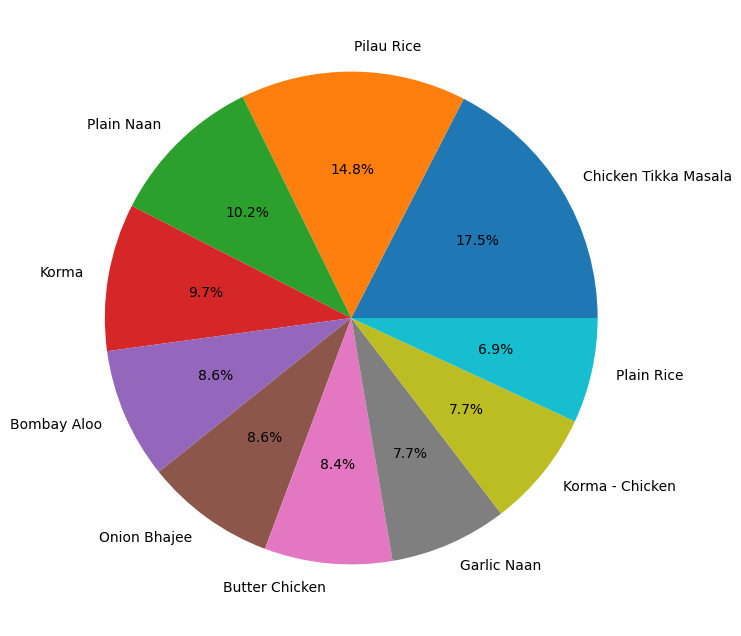

In [16]:
sql_formatted['item_price'] = sql_formatted["price"] * sql_formatted["quantity"]
product_and_price = sql_formatted.groupby('name')['item_price'].sum()

top_10_products_by_price = product_and_price.nlargest(10)

plt.figure(figsize=(10, 8))
plt.pie(
    top_10_products_by_price,
    labels=top_10_products_by_price.index,
    autopct="%1.1f%%"
)

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

([<matplotlib.axis.XTick at 0x1ac9b4565c0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

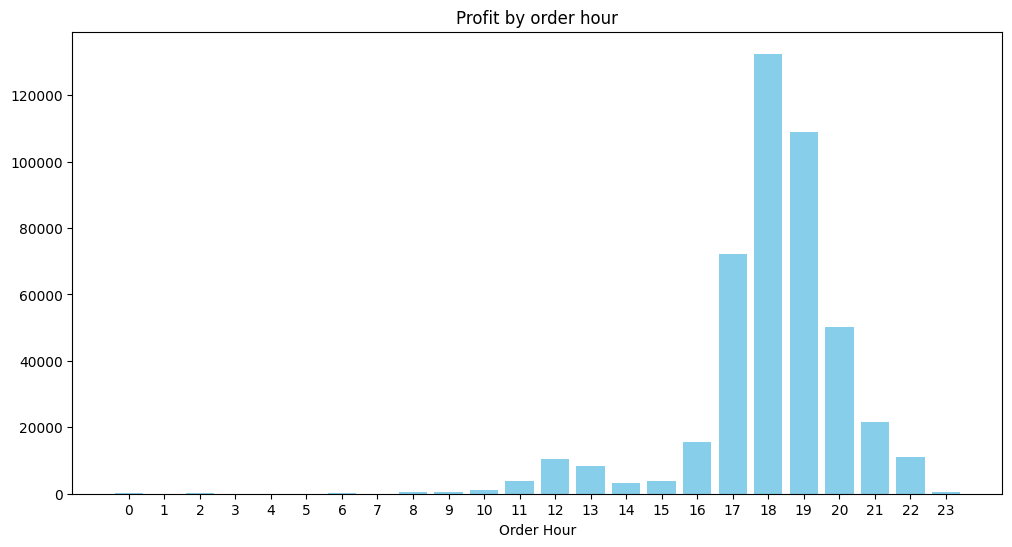

In [20]:
sql_formatted['datetime'] = pd.to_datetime(sql_formatted['datetime'])

sql_formatted['order_hour'] = sql_formatted['datetime'].dt.hour

sql_formatted['item_price'] = sql_formatted['price'] * sql_formatted['quantity']

income_by_hour = sql_formatted.groupby('order_hour')['item_price'].sum()

plt.figure(figsize=(12, 6))
plt.bar(income_by_hour.index, income_by_hour, color='skyblue')
plt.xlabel('Order Hour')
plt.title('Profit by order hour')
plt.xticks(range(24))

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

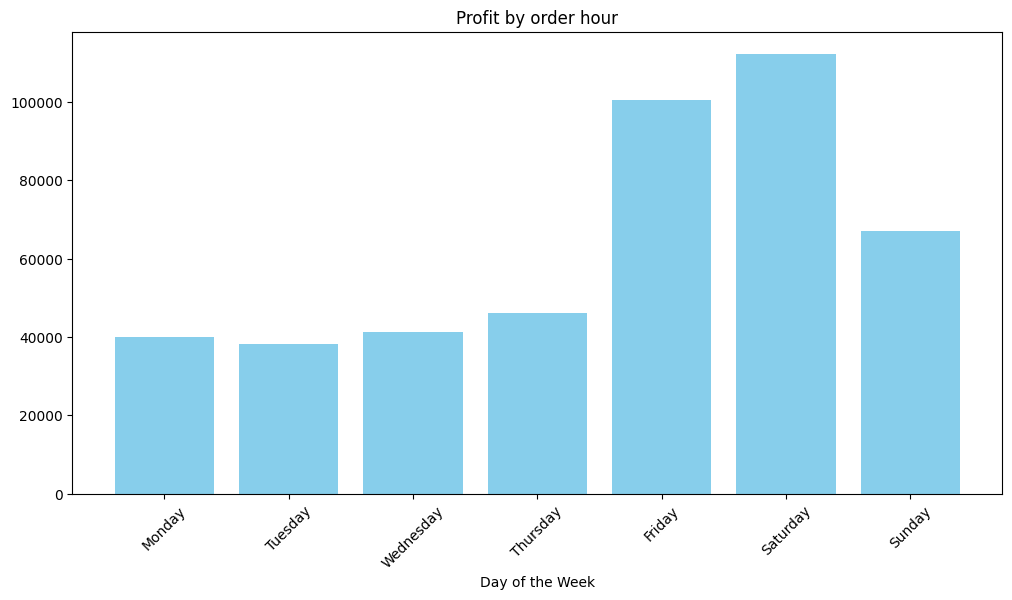

In [22]:
sql_formatted['datetime'] = pd.to_datetime(sql_formatted['datetime'])

sql_formatted['day_of_week'] = sql_formatted['datetime'].dt.day_name()

sql_formatted['item_price'] = sql_formatted['price'] * sql_formatted['quantity']

income_by_day = sql_formatted.groupby('day_of_week')['item_price'].sum()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
income_by_day = income_by_day.reindex(ordered_days)

plt.figure(figsize=(12, 6))
plt.bar(income_by_day.index, income_by_day, color='skyblue')
plt.xlabel('Day of the Week')
plt.title('Profit by order hour')
plt.xticks(rotation=45)